Task 1: Data Cleaning & Preprocessing (Titanic Dataset)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re


In [2]:
df = pd.read_csv("C:/Users/ADMIN/Downloads/Elevate Labs Tasks/Titanic-Dataset.csv")

print(df.head())
print(df.info())
# Statistical summary
print(df.describe(include="all"))
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Missing Values

In [3]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns=['Cabin'], inplace=True)
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23188\3484716749.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23188\3484716749.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Categorical Variables

In [4]:
# Convert Gender/Sex to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

Normalization & Standardization

In [5]:
#scaling on Age and Fare
scaler_norm = MinMaxScaler()
scaler_std = StandardScaler()

df[['Age_norm', 'Fare_norm']] = scaler_norm.fit_transform(df[['Age', 'Fare']])
df[['Age_std', 'Fare_std']] = scaler_std.fit_transform(df[['Age', 'Fare']])

print(df[['Age', 'Age_norm', 'Age_std']].head())


    Age  Age_norm   Age_std
0  22.0  0.271174 -0.565736
1  38.0  0.472229  0.663861
2  26.0  0.321438 -0.258337
3  35.0  0.434531  0.433312
4  35.0  0.434531  0.433312


Outlier Detection & Removal

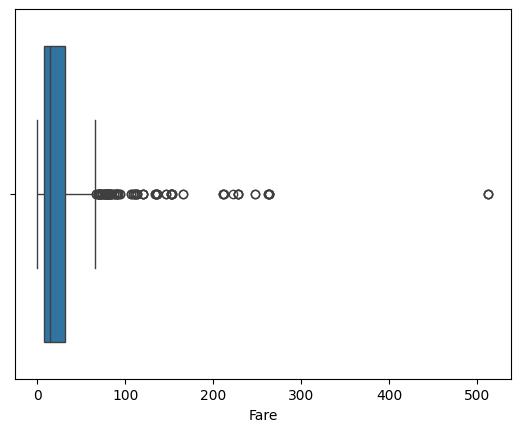

After removing outliers, shape = (775, 16)


In [6]:
# Boxplot
sns.boxplot(x=df['Fare'])
plt.show()

# Remove outliers using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print("After removing outliers, shape =", df.shape)


Saving Clean Datase

In [7]:
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0  22.0      1      0   
2                        Heikkinen, Miss. Laina    1  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                      Allen, Mr. William Henry    0  35.0      0      0   
5                              Moran, Mr. James    0  28.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  Age_norm  Fare_norm  \
0         A/5 21171   7.2500       False        True  0.271174   0.014151   
2  STON/O2. 3101282   7.9250       False        True  0.321438   0.015469   
3            113803  53.1000       False        True  0.434531   0.103644   
4            37345

Task 2 ---- EDA

In [24]:
# Overview of the cleaned dataset
print(df.describe(include="all"))

# Target variable balance
print("\nSurvival distribution:")
print(df['Survived'].value_counts(normalize=True))


        PassengerId    Survived     Pclass                 Name         Sex  \
count    775.000000  775.000000  775.00000                  775  775.000000   
unique          NaN         NaN        NaN                  775         NaN   
top             NaN         NaN        NaN  Dooley, Mr. Patrick         NaN   
freq            NaN         NaN        NaN                    1         NaN   
mean     445.806452    0.339355    2.48000                  NaN    0.314839   
std      260.116285    0.473796    0.73439                  NaN    0.464752   
min        1.000000    0.000000    1.00000                  NaN    0.000000   
25%      213.500000    0.000000    2.00000                  NaN    0.000000   
50%      450.000000    0.000000    3.00000                  NaN    0.000000   
75%      670.500000    1.000000    3.00000                  NaN    1.000000   
max      891.000000    1.000000    3.00000                  NaN    1.000000   

               Age       SibSp       Parch  Ticket 

Analysis (Single-Variable Distributions):

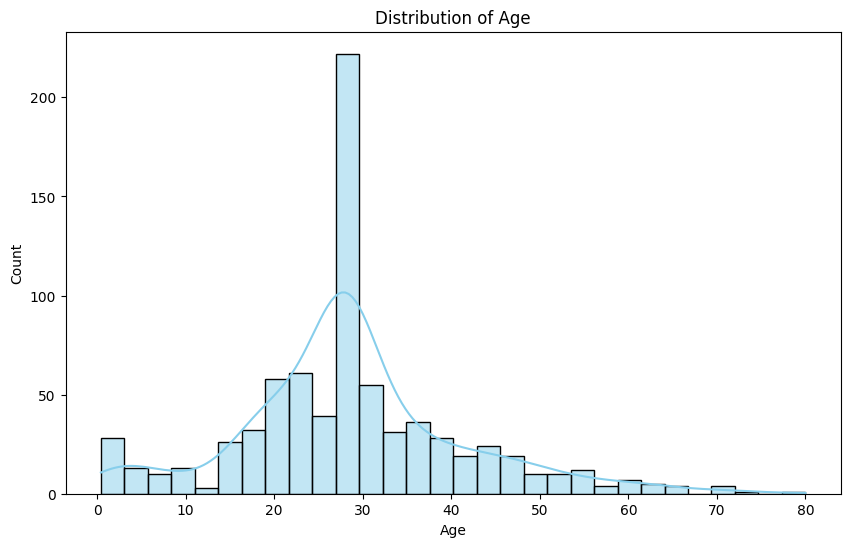

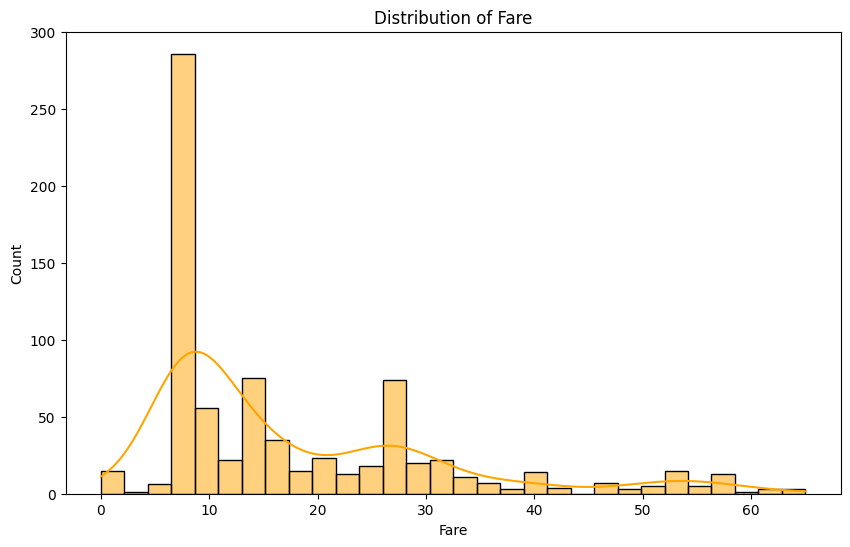

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23188\451525479.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


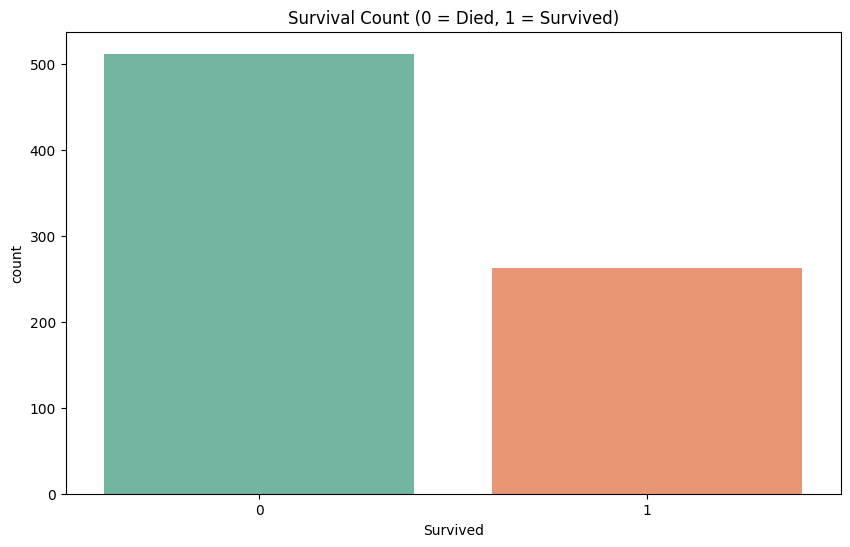

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23188\451525479.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="pastel")


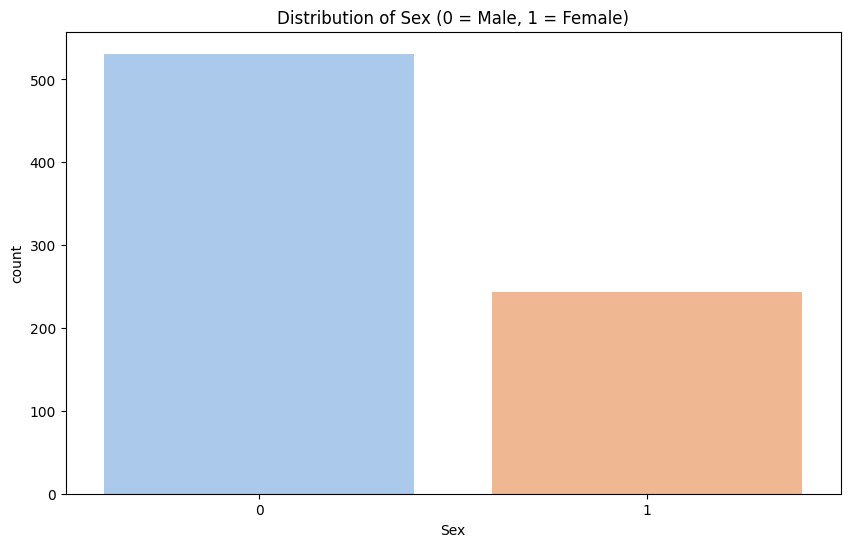

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23188\451525479.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=df, palette="muted")


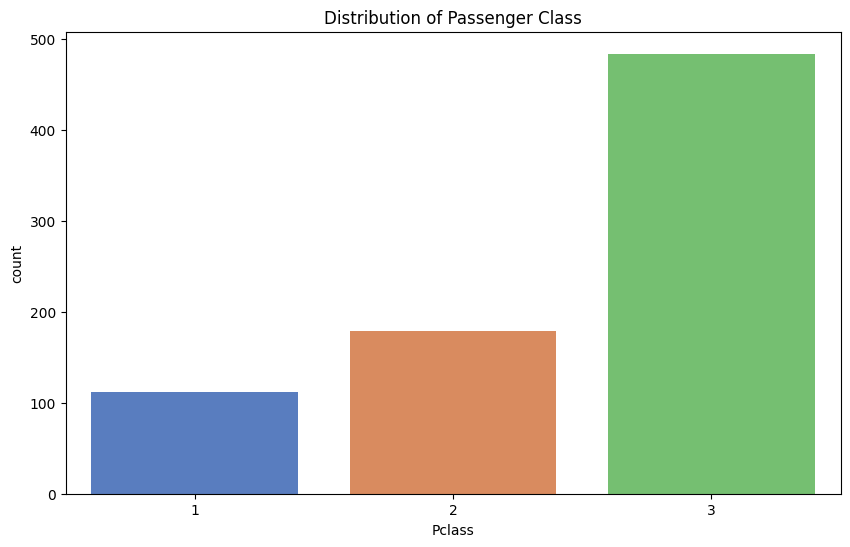

In [ ]:
# Age distribution
sns.histplot(df['Age'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Age")
plt.show()
# Fare distribution
sns.histplot(df['Fare'], bins=30, kde=True, color="orange")
plt.title("Distribution of Fare")
plt.show()
# Survival counts
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()
# Gender distribution
sns.countplot(x="Sex", data=df, palette="pastel")
plt.title("Distribution of Sex (0 = Male, 1 = Female)")
plt.show()
# Class distribution
sns.countplot(x="Pclass", data=df, palette="muted")
plt.title("Distribution of Passenger Class")
plt.show()

Bivariate Analysis (Feature vs Survival)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23188\4135290250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, palette="Set2")


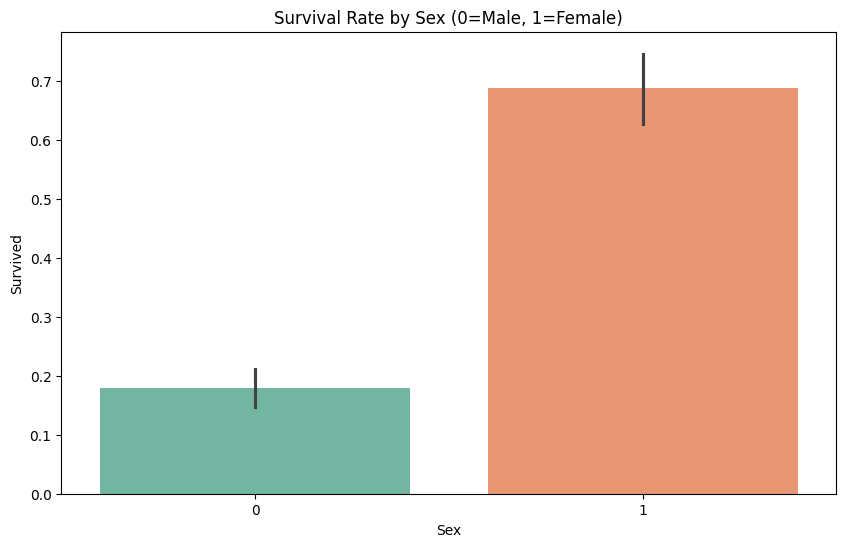

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23188\4135290250.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="Set1")


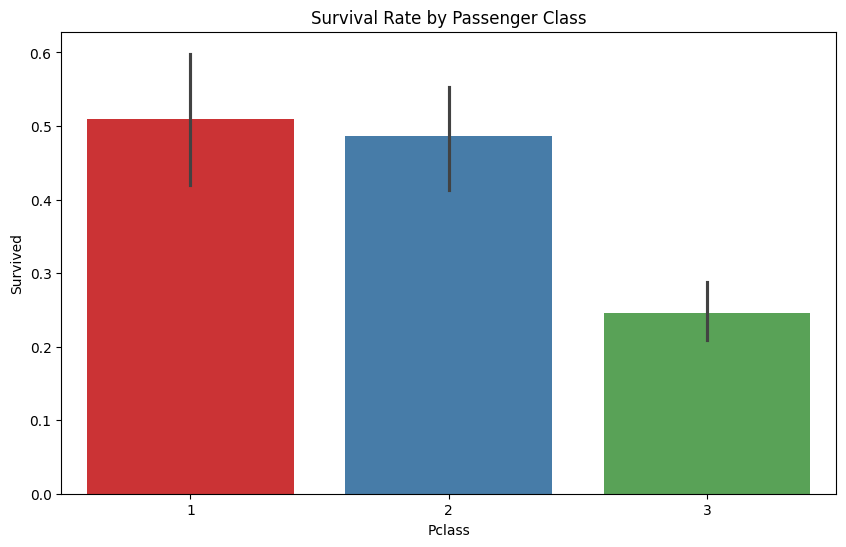

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23188\4135290250.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=df, palette="Set3")


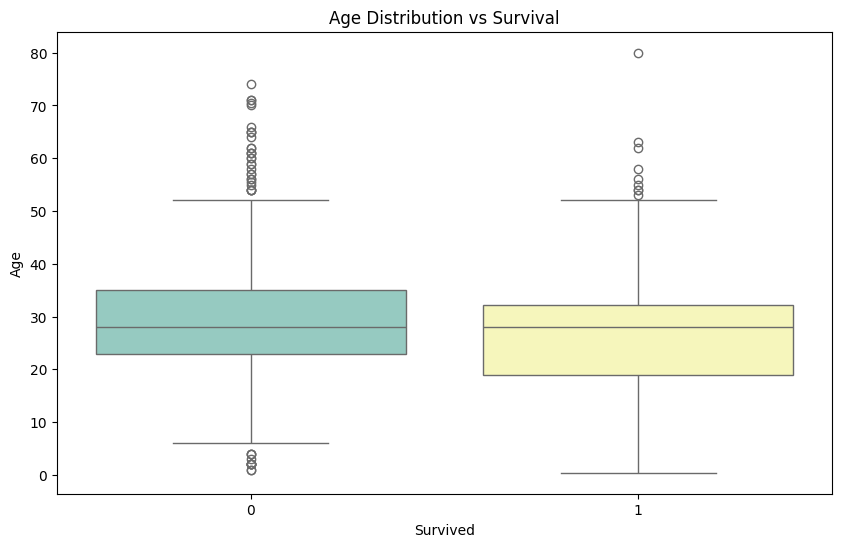

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23188\4135290250.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette="coolwarm")


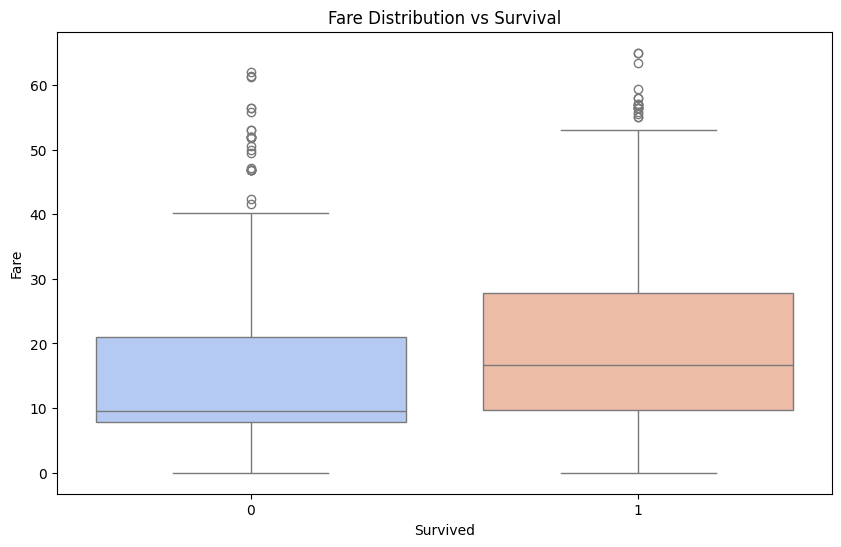

In [28]:
# Survival by Sex
sns.barplot(x="Sex", y="Survived", data=df, palette="Set2")
plt.title("Survival Rate by Sex (0=Male, 1=Female)")
plt.show()
# Survival by Passenger Class
sns.barplot(x="Pclass", y="Survived", data=df, palette="Set1")
plt.title("Survival Rate by Passenger Class")
plt.show()
# Age vs Survival
sns.boxplot(x="Survived", y="Age", data=df, palette="Set3")
plt.title("Age Distribution vs Survival")
plt.show()
# Fare vs Survival
sns.boxplot(x="Survived", y="Fare", data=df, palette="coolwarm")
plt.title("Fare Distribution vs Survival")
plt.show()

Correlation Analysis

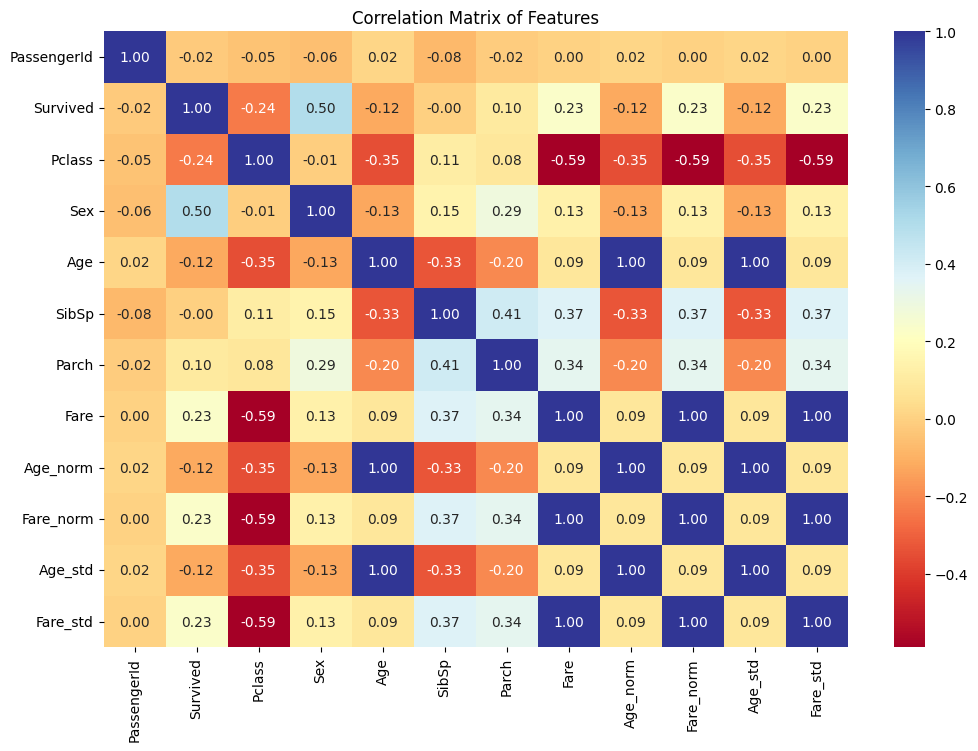

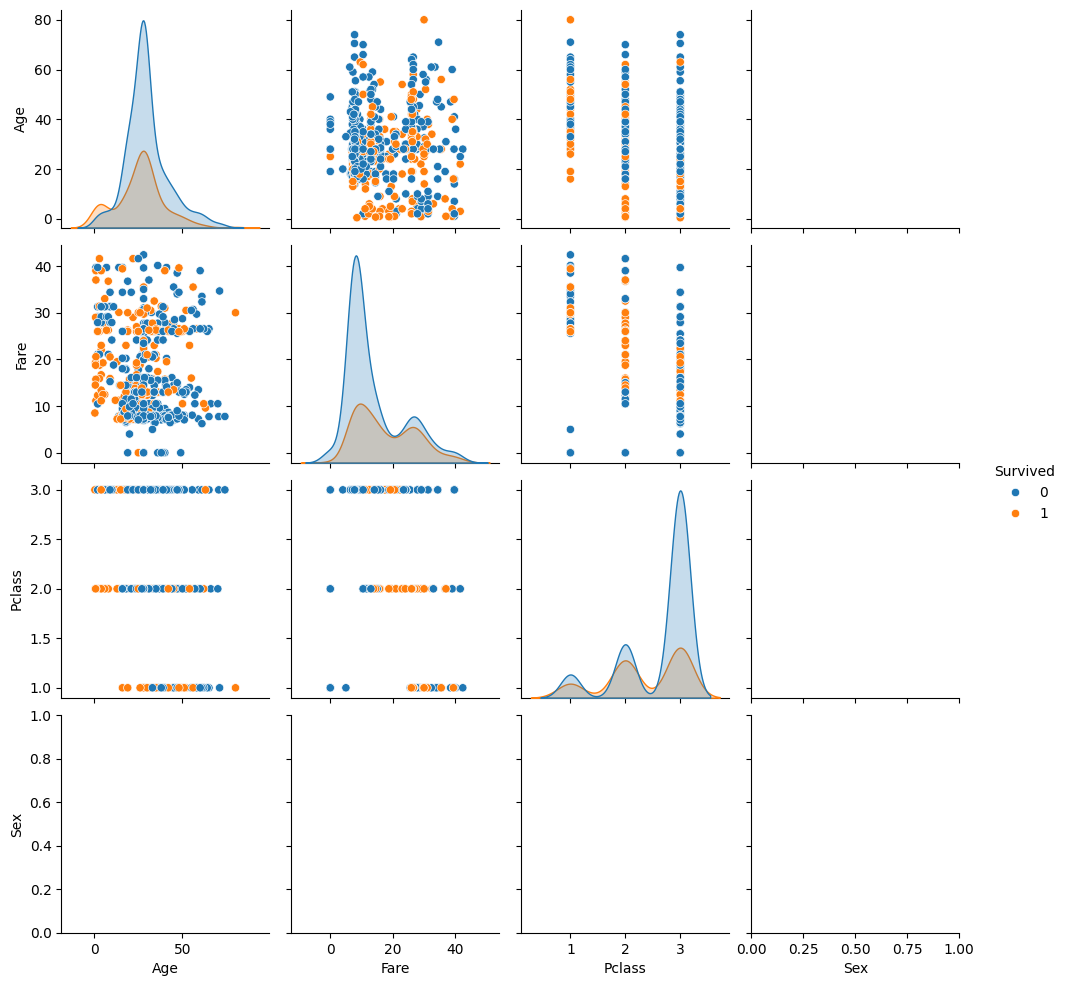

In [34]:
# Correlation matrix (drop non-numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdYlBu", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Pairplot 
sns.pairplot(data[["Survived", "Age", "Fare", "Pclass", "Sex"]], hue="Survived", diag_kind="kde")
plt.show()